Notebook to explore the possibility of internal wave beams generate at the slopes of the fraser river.

In [43]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from salishsea_tools.nowcast import analyze

/home/nsoontie/anaconda3/lib/python3.4/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [40]:
f = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/02nov15/SalishSea_1h_20151102_20151102_grid_W.nc')

w =f.variables['vovecrtz'][:]
w=np.ma.masked_values(w,0)
d = f.variables['depthw']

f = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/02nov15/SalishSea_1h_20151102_20151102_grid_U.nc')

u =f.variables['vozocrtx'][:]
u=np.ma.masked_values(u,0)
du = f.variables['depthu'][:]

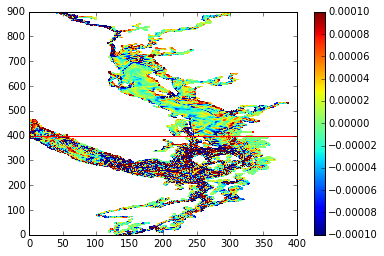

In [41]:
plt.pcolormesh(w[10,1,:,:],vmin=-0.0001,vmax=.0001)
j=400
plt.plot([0,400],[j,j],'r')
plt.colorbar()

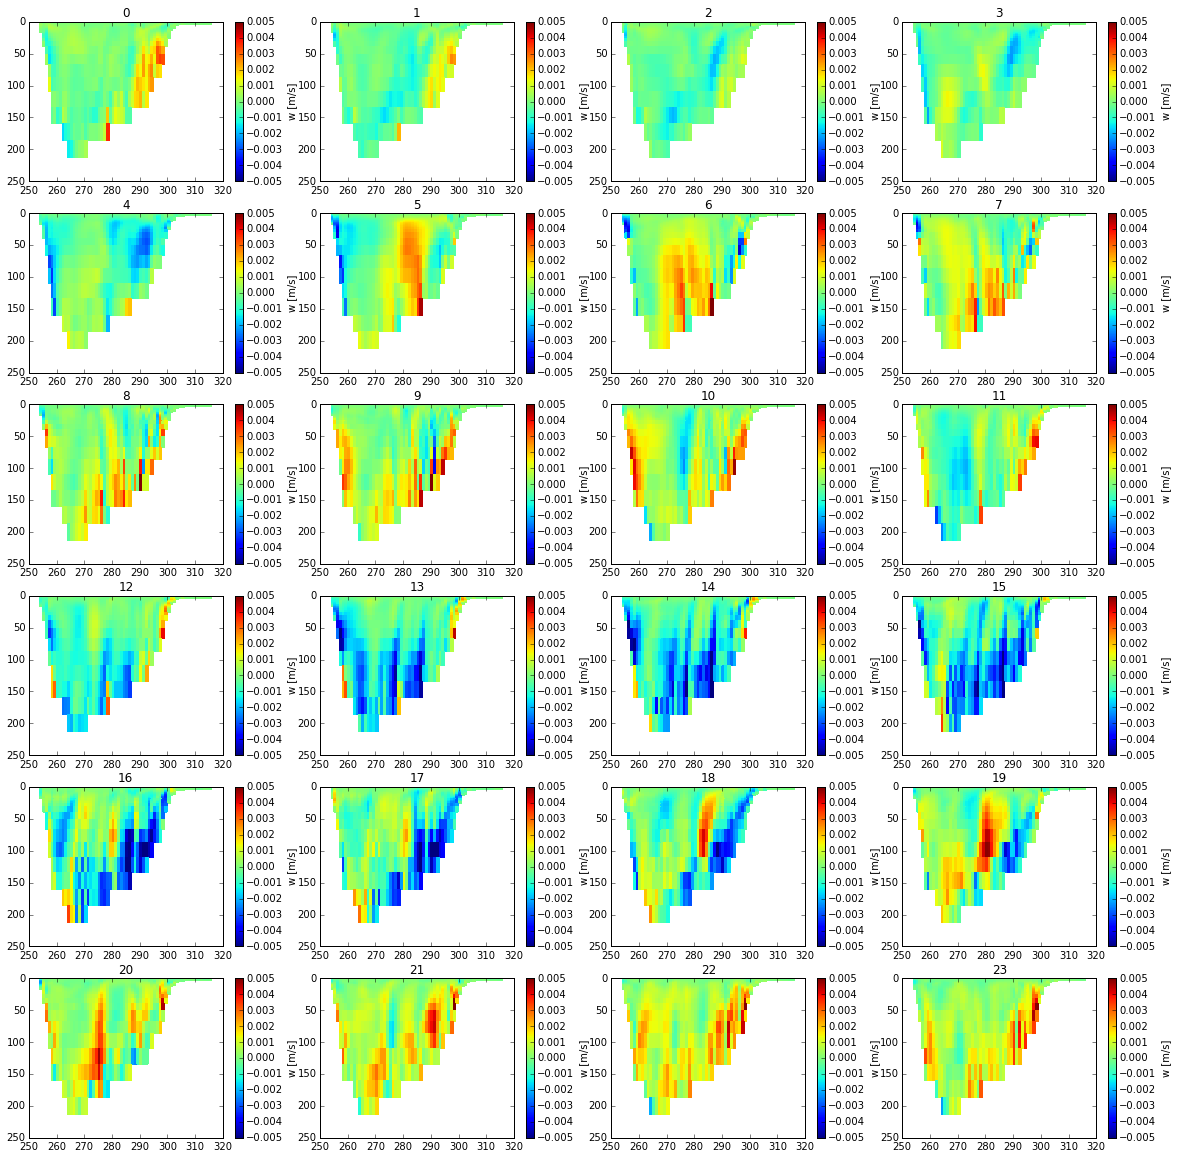

In [42]:
fig, axs = plt.subplots(6,4, figsize=(20,20))
for t,ax in zip(np.arange(w.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(np.arange(w.shape[-1]), d[:], w[t,:,j,:],vmin=-0.005,vmax=0.005)
    ax.axis([250,320,250,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('w [m/s]') 
    ax.set_title(t)

Coherhent beams? Do I have to separate barotoproic combeinent somehow? Is this just noise? Maybe look at baroclinic u? What about at a certain freqeuncy?

In [45]:
depav = analyze.depth_average(u,du,1)

In [47]:
depav = np.expand_dims(depav,1)
ubc = u-depav

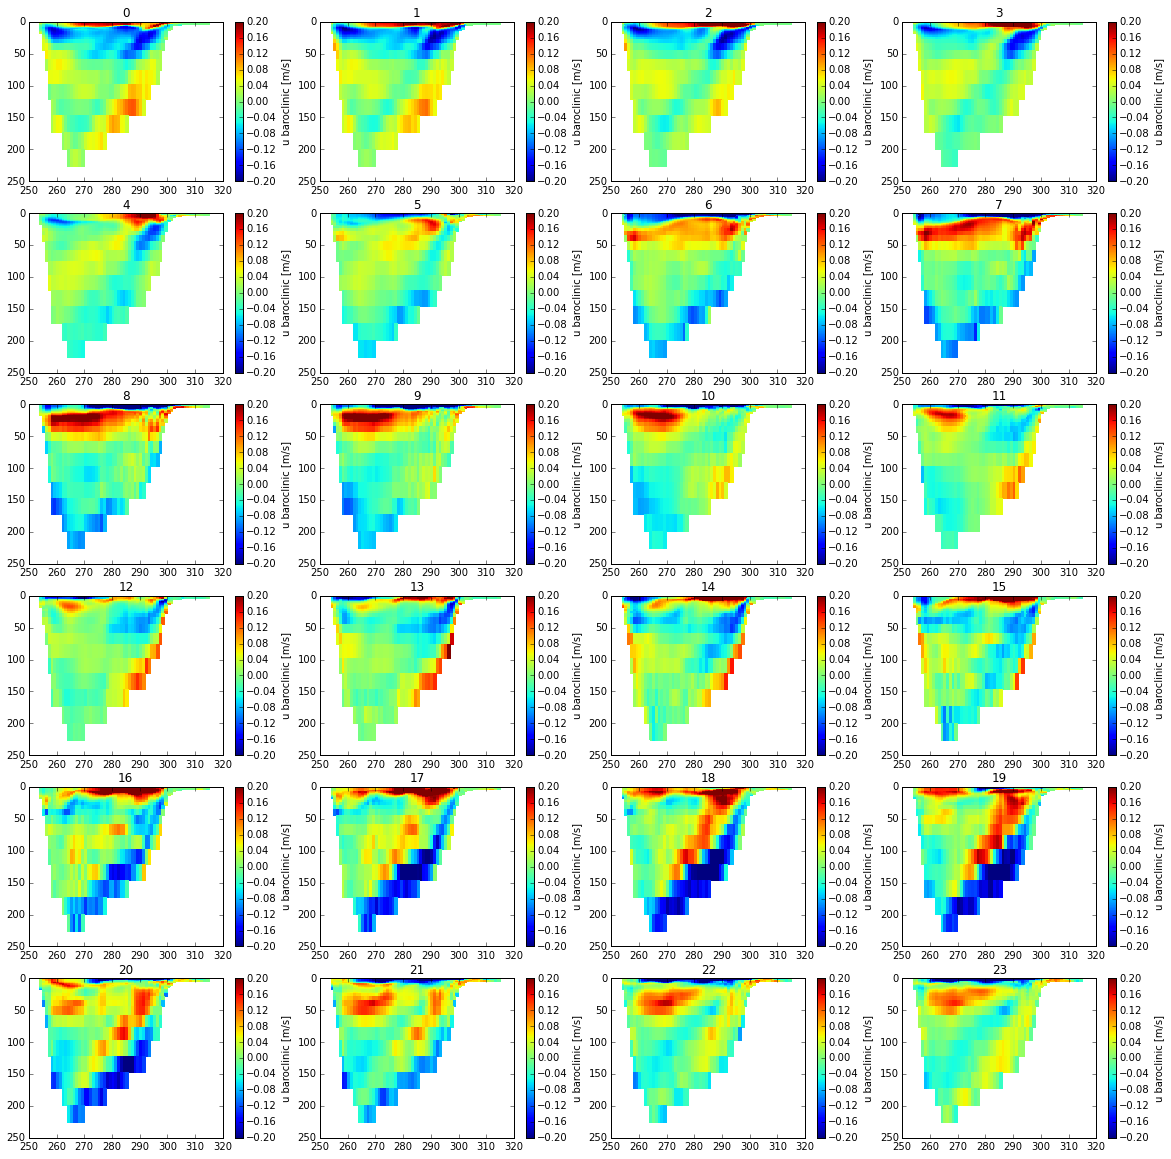

In [50]:
fig, axs = plt.subplots(6,4, figsize=(20,20))
for t,ax in zip(np.arange(ubc.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(np.arange(ubc.shape[-1]), du[:], ubc[t,:,j,:],vmin=-.2,vmax=.2)
    ax.axis([250,320,250,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('u baroclinic [m/s]') 
    ax.set_title(t)

Maybe it is about time to do a back of the envelope calculation for the angle of any internal wave beams we might expect. Remember that I am doing the depth averaging my shitty way and should improve that.

Question: is the wave generated by a relflection from a different source or is the banks the generation point, Look at the reference Susan suggested.